In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split


In [97]:
df = pd.read_csv("D:\\Downloads\\Karachi_Property_Dataset.csv")
df.head(10)


,Price,ID,Address,Bathrooms,Bedrooms,Size/Area,Purpose,Type,Real State Agency,Real State Agent Name
0,PKR7.9 Crore,34881234,"DHA Phase 6, DHA Defence, Karachi, Sindh",4,5,300 Sq. Yd.,For Sale,House,Bukhari Properties,Bukhari Properties Builders
1,PKR1.88 Crore,38292537,"Bahria Town - Precinct 11-A, Bahria Town - Pre...",3,3,150 Sq. Yd.,For Sale,House,Rohan Real Estate,Gul Ahmed
2,PKR2.3 Crore,37292645,"Bahria Town - Precinct 10-A, Bahria Town Karac...",3,3,200 Sq. Yd.,For Sale,House,Z & A Real Estate & Builders,Asim Khaliq
3,PKR12.99 Crore,38291342,"DHA Phase 5, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Safeway Estate & Builders,Sikandar Minhas Zubair Khan
4,PKR95 Lakh,37930847,"Bahria Greens, Bahria Town Karachi, Karachi, S...",3,3,75 Sq. Yd.,For Sale,House,Al Waiz Group,Aamir Shahzad Waiz
5,PKR74 Lakh,8142081,"Bahria Town Karachi, Karachi, Sindh",2,2,94 Sq. Yd.,For Sale,Flat,ALI SAQLAIN Real Estate & Builders,ALI SAQLAIN Real Estate & Builders
6,PKR3.8 Crore,7383229,"Lakhani Presidency, Rashid Minhas Road, Karach...",3,4,267 Sq. Yd.,For Sale,Flat,Urban Properties Pk,Daniyal Lashkarwala
7,PKR8.1 Crore,38173876,"DHA Phase 5, DHA Defence, Karachi, Sindh",4,5,500 Sq. Yd.,For Sale,House,Property Zone,Humayun
8,PKR10.5 Crore,37840607,"DHA Phase 6, DHA Defence, Karachi, Sindh",5,6,500 Sq. Yd.,For Sale,House,CITI Associates,Naveed Zafar
9,PKR1.6 Crore,Portion 37880304,"North Nazimabad - Block J, North Nazimabad, Ka...",3,3,200 Sq. Yd.,For Sale,Lower Portion,Faha Enterprises,Owais Rizvi


# Performing Data Cleaning 

In [98]:


#removing PKR from price column
df['Price Only'] = df['Price'].str.replace('PKR','')
df

,Price,ID,Address,Bathrooms,Bedrooms,Size/Area,Purpose,Type,Real State Agency,Real State Agent Name,Price Only
0,PKR7.9 Crore,34881234,"DHA Phase 6, DHA Defence, Karachi, Sindh",4,5,300 Sq. Yd.,For Sale,House,Bukhari Properties,Bukhari Properties Builders,7.9 Crore
1,PKR1.88 Crore,38292537,"Bahria Town - Precinct 11-A, Bahria Town - Pre...",3,3,150 Sq. Yd.,For Sale,House,Rohan Real Estate,Gul Ahmed,1.88 Crore
2,PKR2.3 Crore,37292645,"Bahria Town - Precinct 10-A, Bahria Town Karac...",3,3,200 Sq. Yd.,For Sale,House,Z & A Real Estate & Builders,Asim Khaliq,2.3 Crore
3,PKR12.99 Crore,38291342,"DHA Phase 5, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Safeway Estate & Builders,Sikandar Minhas Zubair Khan,12.99 Crore
4,PKR95 Lakh,37930847,"Bahria Greens, Bahria Town Karachi, Karachi, S...",3,3,75 Sq. Yd.,For Sale,House,Al Waiz Group,Aamir Shahzad Waiz,95 Lakh
...,...,...,...,...,...,...,...,...,...,...,...
17773,PKR15.5 Crore,38371552,"DHA Phase 8, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Mairaj Umrani,15.5 Crore
17774,PKR17 Crore,38371550,"DHA Phase 6, DHA Defence, Karachi, Sindh",5,5,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,17 Crore
17775,PKR18 Crore,38371547,"DHA Phase 6, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,18 Crore
17776,PKR1.27 Crore,8371470,"Bahria Heights, Bahria Town Karachi, Karachi, ...",2,2,120 Sq. Yd,For Sale,Flat,Na,Na,1.27 Crore


In [99]:
#replacing Crore as C 
df['Price Only'] = df['Price Only'].str.replace('Crore','C')
df

,Price,ID,Address,Bathrooms,Bedrooms,Size/Area,Purpose,Type,Real State Agency,Real State Agent Name,Price Only
0,PKR7.9 Crore,34881234,"DHA Phase 6, DHA Defence, Karachi, Sindh",4,5,300 Sq. Yd.,For Sale,House,Bukhari Properties,Bukhari Properties Builders,7.9 C
1,PKR1.88 Crore,38292537,"Bahria Town - Precinct 11-A, Bahria Town - Pre...",3,3,150 Sq. Yd.,For Sale,House,Rohan Real Estate,Gul Ahmed,1.88 C
2,PKR2.3 Crore,37292645,"Bahria Town - Precinct 10-A, Bahria Town Karac...",3,3,200 Sq. Yd.,For Sale,House,Z & A Real Estate & Builders,Asim Khaliq,2.3 C
3,PKR12.99 Crore,38291342,"DHA Phase 5, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Safeway Estate & Builders,Sikandar Minhas Zubair Khan,12.99 C
4,PKR95 Lakh,37930847,"Bahria Greens, Bahria Town Karachi, Karachi, S...",3,3,75 Sq. Yd.,For Sale,House,Al Waiz Group,Aamir Shahzad Waiz,95 Lakh
...,...,...,...,...,...,...,...,...,...,...,...
17773,PKR15.5 Crore,38371552,"DHA Phase 8, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Mairaj Umrani,15.5 C
17774,PKR17 Crore,38371550,"DHA Phase 6, DHA Defence, Karachi, Sindh",5,5,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,17 C
17775,PKR18 Crore,38371547,"DHA Phase 6, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,18 C
17776,PKR1.27 Crore,8371470,"Bahria Heights, Bahria Town Karachi, Karachi, ...",2,2,120 Sq. Yd,For Sale,Flat,Na,Na,1.27 C


In [100]:
#replacing lakh as L 

df['Price Only'] = df['Price Only'].str.replace('Lakh','L')
df

,Price,ID,Address,Bathrooms,Bedrooms,Size/Area,Purpose,Type,Real State Agency,Real State Agent Name,Price Only
0,PKR7.9 Crore,34881234,"DHA Phase 6, DHA Defence, Karachi, Sindh",4,5,300 Sq. Yd.,For Sale,House,Bukhari Properties,Bukhari Properties Builders,7.9 C
1,PKR1.88 Crore,38292537,"Bahria Town - Precinct 11-A, Bahria Town - Pre...",3,3,150 Sq. Yd.,For Sale,House,Rohan Real Estate,Gul Ahmed,1.88 C
2,PKR2.3 Crore,37292645,"Bahria Town - Precinct 10-A, Bahria Town Karac...",3,3,200 Sq. Yd.,For Sale,House,Z & A Real Estate & Builders,Asim Khaliq,2.3 C
3,PKR12.99 Crore,38291342,"DHA Phase 5, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Safeway Estate & Builders,Sikandar Minhas Zubair Khan,12.99 C
4,PKR95 Lakh,37930847,"Bahria Greens, Bahria Town Karachi, Karachi, S...",3,3,75 Sq. Yd.,For Sale,House,Al Waiz Group,Aamir Shahzad Waiz,95 L
...,...,...,...,...,...,...,...,...,...,...,...
17773,PKR15.5 Crore,38371552,"DHA Phase 8, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Mairaj Umrani,15.5 C
17774,PKR17 Crore,38371550,"DHA Phase 6, DHA Defence, Karachi, Sindh",5,5,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,17 C
17775,PKR18 Crore,38371547,"DHA Phase 6, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,18 C
17776,PKR1.27 Crore,8371470,"Bahria Heights, Bahria Town Karachi, Karachi, ...",2,2,120 Sq. Yd,For Sale,Flat,Na,Na,1.27 C


In [101]:
#removing Na values 

df.drop(df[df['Price Only'] == 'Na'].index, inplace=True)

# Converting Prices in Crores and Lacs into Millions

In [102]:
# Create a new column in the DataFrame to store the prices in millions
df['price_in_millions'] = 0

# Loop through each row of the DataFrame
for index, row in df.iterrows():
    
# Get the value of the price in the price_column
    price = row["Price Only"]

    # Check if the price ends with "C" (indicating Crore) or "L" (indicating Lacs)
    if price[-1] == "C":
      # If the price is in Crore, convert it to millions by dividing by 100
      df.loc[index, 'price_in_millions'] = float(price[:-1]) * 10
    elif price[-1] == "L":
      # If the price is in Lacs, convert it to millions by dividing by 1000
      df.loc[index, 'price_in_millions'] = float(price[:-1]) / 10
    else:
      # If the price is not in Crore or Lacs, assume it is already in millions
      df.loc[index, 'price_in_millions'] = float(price)


# Print the modified DataFrame
print(df)

                Price        ID  \
0        PKR7.9 Crore  34881234   
1       PKR1.88 Crore  38292537   
2        PKR2.3 Crore  37292645   
3      PKR12.99 Crore  38291342   
4          PKR95 Lakh  37930847   
...               ...       ...   
17773   PKR15.5 Crore  38371552   
17774     PKR17 Crore  38371550   
17775     PKR18 Crore  38371547   
17776   PKR1.27 Crore   8371470   
17777    PKR1.5 Crore   4232920   

                                                 Address Bathrooms Bedrooms  \
0               DHA Phase 6, DHA Defence, Karachi, Sindh         4        5   
1      Bahria Town - Precinct 11-A, Bahria Town - Pre...         3        3   
2      Bahria Town - Precinct 10-A, Bahria Town Karac...         3        3   
3               DHA Phase 5, DHA Defence, Karachi, Sindh         6        6   
4      Bahria Greens, Bahria Town Karachi, Karachi, S...         3        3   
...                                                  ...       ...      ...   
17773           DHA Phase 

In [103]:
# Select the column with float values
col = df["price_in_millions"]

# Round off the float values to two decimal places
col = col.round(2)

# Update the dataframe with the rounded values
df["price_in_millions"] = col

# Print the updated dataframe
print(df)





                Price        ID  \
0        PKR7.9 Crore  34881234   
1       PKR1.88 Crore  38292537   
2        PKR2.3 Crore  37292645   
3      PKR12.99 Crore  38291342   
4          PKR95 Lakh  37930847   
...               ...       ...   
17773   PKR15.5 Crore  38371552   
17774     PKR17 Crore  38371550   
17775     PKR18 Crore  38371547   
17776   PKR1.27 Crore   8371470   
17777    PKR1.5 Crore   4232920   

                                                 Address Bathrooms Bedrooms  \
0               DHA Phase 6, DHA Defence, Karachi, Sindh         4        5   
1      Bahria Town - Precinct 11-A, Bahria Town - Pre...         3        3   
2      Bahria Town - Precinct 10-A, Bahria Town Karac...         3        3   
3               DHA Phase 5, DHA Defence, Karachi, Sindh         6        6   
4      Bahria Greens, Bahria Town Karachi, Karachi, S...         3        3   
...                                                  ...       ...      ...   
17773           DHA Phase 

In [104]:
df["price_in_millions"] = df["price_in_millions"].round().astype(int)

df

,Price,ID,Address,Bathrooms,Bedrooms,Size/Area,Purpose,Type,Real State Agency,Real State Agent Name,Price Only,price_in_millions
0,PKR7.9 Crore,34881234,"DHA Phase 6, DHA Defence, Karachi, Sindh",4,5,300 Sq. Yd.,For Sale,House,Bukhari Properties,Bukhari Properties Builders,7.9 C,79
1,PKR1.88 Crore,38292537,"Bahria Town - Precinct 11-A, Bahria Town - Pre...",3,3,150 Sq. Yd.,For Sale,House,Rohan Real Estate,Gul Ahmed,1.88 C,19
2,PKR2.3 Crore,37292645,"Bahria Town - Precinct 10-A, Bahria Town Karac...",3,3,200 Sq. Yd.,For Sale,House,Z & A Real Estate & Builders,Asim Khaliq,2.3 C,23
3,PKR12.99 Crore,38291342,"DHA Phase 5, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Safeway Estate & Builders,Sikandar Minhas Zubair Khan,12.99 C,130
4,PKR95 Lakh,37930847,"Bahria Greens, Bahria Town Karachi, Karachi, S...",3,3,75 Sq. Yd.,For Sale,House,Al Waiz Group,Aamir Shahzad Waiz,95 L,10
...,...,...,...,...,...,...,...,...,...,...,...,...
17773,PKR15.5 Crore,38371552,"DHA Phase 8, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Mairaj Umrani,15.5 C,155
17774,PKR17 Crore,38371550,"DHA Phase 6, DHA Defence, Karachi, Sindh",5,5,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,17 C,170
17775,PKR18 Crore,38371547,"DHA Phase 6, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,18 C,180
17776,PKR1.27 Crore,8371470,"Bahria Heights, Bahria Town Karachi, Karachi, ...",2,2,120 Sq. Yd,For Sale,Flat,Na,Na,1.27 C,13


In [105]:
df['ID'] = range(1, len(df)+1)
df

,Price,ID,Address,Bathrooms,Bedrooms,Size/Area,Purpose,Type,Real State Agency,Real State Agent Name,Price Only,price_in_millions
0,PKR7.9 Crore,1,"DHA Phase 6, DHA Defence, Karachi, Sindh",4,5,300 Sq. Yd.,For Sale,House,Bukhari Properties,Bukhari Properties Builders,7.9 C,79
1,PKR1.88 Crore,2,"Bahria Town - Precinct 11-A, Bahria Town - Pre...",3,3,150 Sq. Yd.,For Sale,House,Rohan Real Estate,Gul Ahmed,1.88 C,19
2,PKR2.3 Crore,3,"Bahria Town - Precinct 10-A, Bahria Town Karac...",3,3,200 Sq. Yd.,For Sale,House,Z & A Real Estate & Builders,Asim Khaliq,2.3 C,23
3,PKR12.99 Crore,4,"DHA Phase 5, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Safeway Estate & Builders,Sikandar Minhas Zubair Khan,12.99 C,130
4,PKR95 Lakh,5,"Bahria Greens, Bahria Town Karachi, Karachi, S...",3,3,75 Sq. Yd.,For Sale,House,Al Waiz Group,Aamir Shahzad Waiz,95 L,10
...,...,...,...,...,...,...,...,...,...,...,...,...
17773,PKR15.5 Crore,16599,"DHA Phase 8, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Mairaj Umrani,15.5 C,155
17774,PKR17 Crore,16600,"DHA Phase 6, DHA Defence, Karachi, Sindh",5,5,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,17 C,170
17775,PKR18 Crore,16601,"DHA Phase 6, DHA Defence, Karachi, Sindh",6,6,500 Sq. Yd.,For Sale,House,Diplomat Estate,Rizwan Suria,18 C,180
17776,PKR1.27 Crore,16602,"Bahria Heights, Bahria Town Karachi, Karachi, ...",2,2,120 Sq. Yd,For Sale,Flat,Na,Na,1.27 C,13


In [106]:
#Drop unnecessary columns

df = df.drop(columns=['Price', 'Real State Agency', 'Real State Agent Name', "Price Only"])
df.dropna(axis=0, inplace=True)


In [107]:
# Drop Na values
df.drop(df[df['ID'] == 'Na'].index, inplace=True)
df.drop(df[df['Address'] == 'Na'].index, inplace=True)
df.drop(df[df['Bathrooms'] == 'Na'].index, inplace=True)
df.drop(df[df['Bedrooms'] == 'Na'].index, inplace=True)
df.drop(df[df['Size/Area'] == 'Na'].index, inplace=True)
df.drop(df[df['Purpose'] == 'Na'].index, inplace=True)
df.drop(df[df['Type'] == 'Na'].index, inplace=True)
df.drop(df[df['price_in_millions'] == 'Na'].index, inplace=True)



In [108]:
#removing square yard from Size column

df["Size/Area"] = df["Size/Area"].str.replace("[a-zA-Z]", "")


df = df.drop(columns=["Purpose"])

#Split Address columns
df["area"] = df["Address"].str.split(",").str[-3]

df['area'] = df['area'].str.strip()

df["area2"] = df["Address"].str.split(",").str[0]

df['area2'] = df['area2'].str.strip()

df["Size/Area"] = df["Size/Area"].str.replace("['.']", "")

df = df.drop(columns=['Address'])

# replace 1,000 and 2,000 with corresponding integer values
df["Size/Area"].replace({"1,000": 1000, "2,000": 2000, "1,332":1332,"1,333":1333}, inplace=True)

# convert values in column1 to integer
df["Size/Area"] = pd.to_numeric(df["Size/Area"], errors="coerce")

# drop or replace any NaN values
df.dropna(subset=["Size/Area"], inplace=True)

#this dataset can be used in analysis
df.to_csv("my_karachi_dataset_for_visualization.csv", index=False)



C:\Users\abc\AppData\Local\Temp\ipykernel_9236\1998246092.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Size/Area"] = df["Size/Area"].str.replace("[a-zA-Z]", "")
C:\Users\abc\AppData\Local\Temp\ipykernel_9236\1998246092.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Size/Area"] = df["Size/Area"].str.replace("['.']", "")


# Performing some Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Bathrooms                                  16280 non-null  int64  
 1   Bedrooms                                   16280 non-null  int64  
 2   Size/Area                                  16280 non-null  float64
 3   price_in_millions                          16280 non-null  int64  
 4   Flat                                       16280 non-null  int64  
 5   House                                      16280 non-null  int64  
 6   Lower Portion                              16280 non-null  int64  
 7   Penthouse                                  16280 non-null  int64  
 8   Upper Portion                              16280 non-null  int64  
 9   Airport Road                               16280 non-null  int64  
 10  Al-Hilal Society      

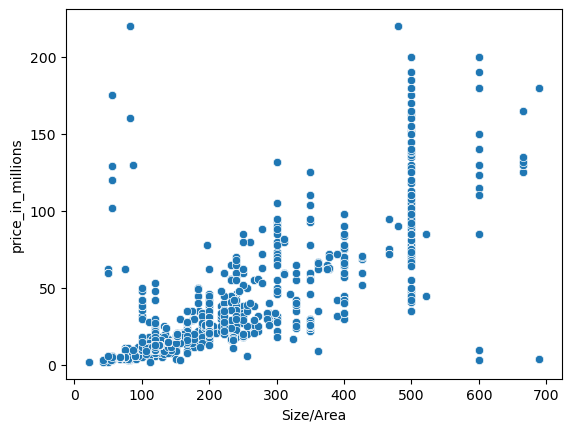

                                           Bathrooms  Bedrooms  Size/Area  \
Bathrooms                                   1.000000  0.966166   0.860775   
Bedrooms                                    0.966166  1.000000   0.852516   
Size/Area                                   0.860775  0.852516   1.000000   
price_in_millions                           0.824749  0.810879   0.871818   
Flat                                       -0.672123 -0.622124  -0.558109   
House                                       0.691588  0.676598   0.578151   
Lower Portion                               0.011692  0.012376   0.043944   
Penthouse                                   0.014092  0.004243   0.040096   
Upper Portion                              -0.019667 -0.091365  -0.037246   
Airport Road                               -0.001447  0.012083  -0.004601   
Al-Hilal Society                            0.012869  0.011186   0.003817   
Amir Khusro                                 0.008154  0.006553  -0.001234   

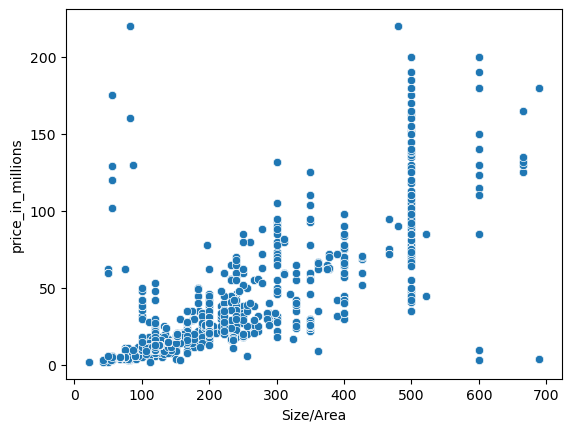

In [126]:



# explore the data
# print(df.head())
print(df.info())
print(df.describe())

# visualize the data
sns.scatterplot(x='Size/Area', y='price_in_millions', data=df)
plt.show()

# clean the data
df = df.dropna()

# analyze the data
print(df.corr())
sns.scatterplot(x='Size/Area', y='price_in_millions', data=df)
plt.show()


In [110]:
df

,ID,Bathrooms,Bedrooms,Size/Area,Type,price_in_millions,area,area2
0,1,4,5,300.0,House,79,DHA Defence,DHA Phase 6
1,2,3,3,150.0,House,19,Bahria Town Karachi,Bahria Town - Precinct 11-A
2,3,3,3,200.0,House,23,Bahria Town Karachi,Bahria Town - Precinct 10-A
3,4,6,6,500.0,House,130,DHA Defence,DHA Phase 5
4,5,3,3,75.0,House,10,Bahria Town Karachi,Bahria Greens
...,...,...,...,...,...,...,...,...
17773,16599,6,6,500.0,House,155,DHA Defence,DHA Phase 8
17774,16600,5,5,500.0,House,170,DHA Defence,DHA Phase 6
17775,16601,6,6,500.0,House,180,DHA Defence,DHA Phase 6
17776,16602,2,2,120.0,Flat,13,Bahria Town Karachi,Bahria Heights


# Performing One hot encoding on categorical features to apply llinear regression

In [111]:


col = df['Type']
one_hot = pd.get_dummies(col)

area = df['area']
area_one_hot = pd.get_dummies(area)
df = pd.concat([df, one_hot,area_one_hot], axis=1)
df

,ID,Bathrooms,Bedrooms,Size/Area,Type,price_in_millions,area,area2,Flat,House,...,Saadi Road,Scheme 33,Shadman 2,Shah Faisal Town,Shaheed Millat Road,Shahra-e-Faisal,Stadium Road,Super Highway,Tariq Road,Tipu Sultan Road
0,1,4,5,300.0,House,79,DHA Defence,DHA Phase 6,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,3,3,150.0,House,19,Bahria Town Karachi,Bahria Town - Precinct 11-A,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,3,3,200.0,House,23,Bahria Town Karachi,Bahria Town - Precinct 10-A,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,6,6,500.0,House,130,DHA Defence,DHA Phase 5,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,3,3,75.0,House,10,Bahria Town Karachi,Bahria Greens,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17773,16599,6,6,500.0,House,155,DHA Defence,DHA Phase 8,0,1,...,0,0,0,0,0,0,0,0,0,0
17774,16600,5,5,500.0,House,170,DHA Defence,DHA Phase 6,0,1,...,0,0,0,0,0,0,0,0,0,0
17775,16601,6,6,500.0,House,180,DHA Defence,DHA Phase 6,0,1,...,0,0,0,0,0,0,0,0,0,0
17776,16602,2,2,120.0,Flat,13,Bahria Town Karachi,Bahria Heights,1,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
#changing datatypes
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Bedrooms'] = df['Bedrooms'].astype(int)
df = df.drop(columns=['Type','ID', 'area', 'area2'])



In [116]:
#this dataset can be use to apply Linear Regression
df.to_csv("my_karachi_dataset_for_regression.csv", index=False)

In [117]:
df = pd.read_csv("my_karachi_dataset_for_regression.csv")

In [118]:
df

,Bathrooms,Bedrooms,Size/Area,price_in_millions,Flat,House,Lower Portion,Penthouse,Upper Portion,Airport Road,...,Saadi Road,Scheme 33,Shadman 2,Shah Faisal Town,Shaheed Millat Road,Shahra-e-Faisal,Stadium Road,Super Highway,Tariq Road,Tipu Sultan Road
0,4,5,300.0,79,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,150.0,19,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,200.0,23,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,6,500.0,130,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,75.0,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,6,6,500.0,155,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16276,5,5,500.0,170,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16277,6,6,500.0,180,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16278,2,2,120.0,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying KNN 

In [120]:

# load the house price dataset
X = df.drop(['price_in_millions'], axis=1)
y = df['price_in_millions']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# choose the value of K
k = int(np.sqrt(len(X_train)))

# train the model
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# # The Mean Squared Error measures how close a regression line is to a set of data points.

print('Mean squared error:', mse)

# The lower the MAE, the better a model fits a dataset
print('Mean absolute error:', mae)

Mean squared error: 155.334648895937
Mean absolute error: 4.671957843010475


In [121]:
print(y_pred)

[ 19.04385965  28.16666667  19.04385965 ... 165.85087719   5.
  19.04385965]


# Applying Linear Regression

In [122]:



X = df.drop(['price_in_millions'], axis=1)
print(X)
y = df['price_in_millions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

       Bathrooms  Bedrooms  Size/Area  Flat  House  Lower Portion  Penthouse  \
0              4         5      300.0     0      1              0          0   
1              3         3      150.0     0      1              0          0   
2              3         3      200.0     0      1              0          0   
3              6         6      500.0     0      1              0          0   
4              3         3       75.0     0      1              0          0   
...          ...       ...        ...   ...    ...            ...        ...   
16275          6         6      500.0     0      1              0          0   
16276          5         5      500.0     0      1              0          0   
16277          6         6      500.0     0      1              0          0   
16278          2         2      120.0     1      0              0          0   
16279          2         2      139.0     1      0              0          0   

       Upper Portion  Airport Road  Al-

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# The Mean Squared Error measures how close a regression line is to a set of data points.
print("Mean squared error:", mse)

# r-squared shows how well the data fit the regression model (the goodness of fit)
print("R-squared:", r2)

Mean squared error: 254.9317550351159
R-squared: 0.8932017205904805


In [125]:
new_data = [[6,6,500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
prediction = model.predict(new_data)
print("Prediction for new data:", prediction)
print(model.score(X_train, y_train))

Prediction for new data: [144.00330606]
0.882216908692884


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
